In [3]:
import torch
import torchvision
from torchvision import transforms, datasets 

In [4]:
# Use MNIST dataset, divide into training set and testing set
train = datasets.MNIST("", train = True, download = True,
                      transform = transforms.Compose([transforms.Compose([transforms.ToTensor()])]))

test = datasets.MNIST("", train = False, download = True,
                     transform = transforms.Compose([transforms.Compose([transforms.ToTensor()])])) 

In [5]:
# load the dataset separately into train and test set
trainset =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True )

In [6]:
# print a batch of images with labels
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [7]:
# image tensor -> x, label tensor -> y
# data[0] are tensor of images
# data[1] are tensor of labels
x, y = data[0][0], data[1][1]
print(y)

tensor(6)


In [8]:
import matplotlib.pyplot as plt
print(data[0][0].shape)    # 28*28*1 image

torch.Size([1, 28, 28])


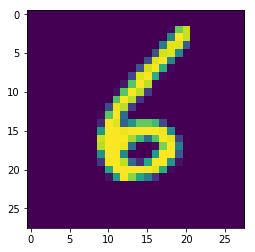

In [9]:
# transfer the image according to the tensor shape, and then show it
plt.imshow(data[0][0].view(28,28))
plt.show()

In [10]:
# Count number of data under each labels to see if the dataset is sample-balanced
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y_i in ys:
        counter_dict[int(y_i)] += 1
        total += 1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [14]:
# compute the portion of each group of samples
for key in counter_dict.keys():
    print(f"label{key}:{counter_dict[key]/total*100}")

label0:9.871666666666666
label1:11.236666666666666
label2:9.93
label3:10.218333333333334
label4:9.736666666666666
label5:9.035
label6:9.863333333333333
label7:10.441666666666666
label8:9.751666666666667
label9:9.915000000000001
